In [ ]:
!pip install -U spacy
!python -m spacy download en_core_web_lg
import nltk
nltk.download('punkt')
nltk.download('stopwords')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 2.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')


Mounted at /content/drive


In [ ]:
import os
import numpy as np
import pandas as pd
import re
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
import spacy
from sklearn.metrics import classification_report
import math
from nltk.corpus import stopwords
from collections import defaultdict

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Ensure necessary NLTK data is downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
path = '/content/drive/MyDrive/datas/cran'

In [ ]:
#------------------------------------------------------------------------------------------------
#files_paths
#files_path[0] quries (questions to test the model )  name: cran.all.1400
#files_path[1] label - cran.qry sorguId document Id name: cran.qry
#files_paths[2]) name :cranqrel instructiions
#files_path[3] are the articals summeries
#------------------------------------------------------------------------------------------------

In [ ]:
def read_file(file_path):
  with open(file_path,"r",encoding="utf-8") as file:
    file = file.read()
    #print(file)
    return file

def get_files_names(folder_path):
    files = []
    for file in os.listdir(folder_path):
      path = os.path.join(folder_path, file)
      files.append(path)
    return files
#print(read_file(files_paths[0]))

In [ ]:
#files_paths
#files_path[0] quries (questions to test the model )  name: cran.all.1400
#files_path[1] label - cran.qry sorguId document Id name: cran.qry
#files_paths[2]) name :cranqrel instructiions
#files_path[3] are the articals summeries



this was to check on the matches if the pattern matching everything or not


In [ ]:
def list_collection_files(folder_path):
  docs=[]
  files_paths = get_files_names(folder_path)
  for file_path in files_paths:
    print(f"path : {file_path} file loading ...................")
    #doc = read_file(file_path)[:1000]
    doc = read_file(file_path)
    docs.append(doc)
    #print(doc)
  return docs
ctr=0
folder_path = "/content/drive/MyDrive/datas/cran"
files_txts_list = list_collection_files(folder_path)
for i in files_txts_list :
  ctr+=1
  print(f"---------------------------file{ctr}------------------------------------------")
  print(i)


Görüntülenen çıkış son 5000 satıra kısaltıldı.
range of mach numbers .
.I 1238
.T
the newtonian approximation in magnetic hypersonic
stagnation-point flow .
.A
lykoudis,p.s.
.B
j. ae. scs. 1961.
.W
the newtonian approximation in magnetic hypersonic
stagnation-point flow .
  the hypersonic flow of an electrically conducting fluid around
the stagnation region of a sphere carrying a radial magnetic field
is examined .
  by assuming a newtonian pressure distribution and constant
density, the differential equation of the inviscid flow is integrated
and a simple closed-form solution is obtained .
  it is found that the ratio of the stand-off distances of the shock
wave for the magnetic and nonmagnetic cases does not depend
explicitly on the magnetic parameter s (ratio of the ponderomotive
force to the free-stream inertia force) nor on the density ratio (the
value at the free stream divided by the value behind the shock
wave) but on the product s at least for values of between
and .
  the vel

In [ ]:
def load_docs(pattern,file_path):
  txt = read_file(file_path)
  print(files_paths[0])
  matches = re.findall(pattern, txt, re.DOTALL)
  return matches

Ar_qu_pairs = np.empty((0,3),dtype=object)
article_dic={}
query_dic={}
patterns= [r'I (\d{3})([\s\S]*?)(?=\.I \d{3}|$)',r"(\d) (\d{1,}) (-\d|\d)","",r'\.I (\d+)\n(.+?)(?=(?:\n\.I \d+)|\Z)']
files_paths = get_files_names(folder_path)
for idx in range(len(files_paths)):
  if idx!=2:
    matches =  load_docs(patterns[idx],files_paths[idx])
    if idx ==0:
      #files_path[0] quries (questions to test the model )  name: cran.all.1400
      for matching in matches :
         query_dic[int(matching[0])]=matching[1][4:-1]
    elif idx==1:
       for matching in matches:
        #files_path[1] label - cran.qry sorguId document Id name: cran.qry
        Ar_qu_pairs = np.append(Ar_qu_pairs, [[matching[0], matching[1], matching[2]]], axis=0)
    elif idx ==3 :
      #print("articales  matches size ", len(matches ))
      #files_path[3] are the articals summeries
      for matching in matches:

        article_dic[int(matching[0])]=matching[1]

print(len(article_dic))
print(len(query_dic))
print(Ar_qu_pairs.shape)


/content/drive/MyDrive/datas/cran/cran.qry
/content/drive/MyDrive/datas/cran/cran.qry
/content/drive/MyDrive/datas/cran/cran.qry
1400
225
(1836, 3)


1. Tokinizing the txt of every doc.
2. Extracting the stop words  and the punctuations.
3. lemmatizaion.
4. lower case

In [ ]:
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalnum()]
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    porter_stemmer = PorterStemmer()
    tokens = [porter_stemmer.stem(word) for word in tokens]
    return tokens

In [ ]:
def build_inverted_index(docs):
    inverted_index = {}
    for doc_id, text in docs.items():
        tokens = preprocess_text(text)
        word = {}
        for token in tokens:
            if token not in word:
                word[token] = 0
            word[token] += 1

        for token, count in word.items():
            if token not in inverted_index:
                inverted_index[token] = {'docId_and_freq': [], '_term_freq_over_docs': 0}
            inverted_index[token]['docId_and_freq'].append([doc_id, count])
            inverted_index[token]['_term_freq_over_docs'] += count
    return inverted_index


testing

In [ ]:
def get_posting_list(inverted_index, query):
  posting_lists = []
  for term in query:
      if term in inverted_index:
          posting_lists.append(inverted_index[term]['docId_and_freq'])
  return posting_lists


In [ ]:
def merge_algorithm(pos1 ,pos2):
  p1,p2= 0,0
  answer = []
  while ((p1 is not None) and ( p2 is not None)):
    if p1 < len(pos1) and p2 < len(pos2):
      docsID1,freq1=pos1[p1]
      docsID2,freq2 =pos2[p2]
      if docsID1==docsID2 :
        answer.append([docsID1,max(freq1,freq2)])
        p1+=1
        p2+=1
      elif docsID1<docsID2:
        p1+=1
      else:
        p2+=1
    elif (p1>=len(pos1) ) or (p2>=len(pos2)):
      p1= None
      p2 = None
  return answer

In [ ]:
  vectors= build_inverted_index(article_dic)

In [ ]:
def bool_retriving(inverted_index,query):
  query_after_processsing= preprocess_text(query)
  posting_lists = get_posting_list(inverted_index, query_after_processsing)
  if not posting_lists:
      return []
  result = posting_lists[0]
  for posting in posting_lists[1:]:
      result = merge_algorithm(result, posting)
  return result

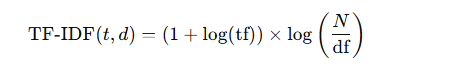

In [ ]:
def tf_clc(inverted_index):
    tf = {}
    for word, docIds_freq in inverted_index.items():
        for docId, freq in docIds_freq['docId_and_freq']:
            if docId not in tf:
                tf[docId] = {}
            tf[docId][word] = freq
    return tf


test tf fun

In [ ]:
def df_clc(inverted_index, word):
    df = len(inverted_index[word]['docId_and_freq'])
    return df


In [ ]:
def idf_clc(docs , inverted_index):
  N=0
  idf={}
  total_tokens_length = [len(preprocess_text(doc)) for _, doc in article_dic.items()]
  for doc_len in total_tokens_length:
    N+=doc_len
  for word, docs_freqs in inverted_index.items():
    df = df_clc(inverted_index, word)
    if df:
      idf[word] = math.log(N / df)
    else:
       idf[word]  = 0
  return idf

In [ ]:
def tfidf_clc(tf, idf):
    tf_idf = {}
    for docId, words in tf.items():
        tf_idf[docId] = {}
        for word, tf_value in words.items():
            tf_idf[docId][word] = tf_value * idf.get(word, 0)
    return tf_idf

In [ ]:

def test_tfidf(inverted_index,article_dic,query):
  query_tf = {}
  query_tf_idf = {}
  #---------------tf-idf--------------------------------------------
  tf = tf_clc(inverted_index)
  idf = idf_clc(article_dic, inverted_index)
  tfidf = tfidf_clc(tf, idf)

  #----------------------process query --------------------------
  qi = preprocess_text(query)
  for tkn in qi:
      if tkn not in query_tf:
          query_tf[tkn] = 0
      query_tf[tkn] += 1

  for word, freq_over_q in query_tf.items():
      query_tf_idf[word] = freq_over_q * idf.get(word, 0)
  return query_tf_idf


query= input("enter ur qeury :")
test_tfidf(vectors,article_dic,query)


enter ur qeury :ask ques


{'ask': 11.838647265024761, 'que': 0}

In [ ]:
def cosin_similarity(vec1, vec2):
  common_words = []
  multi_vecs = 0
  for key in vec1.keys():
      if key in vec2.keys():
          common_words.append(key)
  for common_word in common_words:
      multi_vecs += vec2[common_word] * vec1[common_word]
  v1_intensity = math.sqrt(sum([x**2 for x in vec2.values()]))
  v2_intensity = math.sqrt(sum([x**2 for x in vec1.values()]))
  multi_intensities = v1_intensity * v2_intensity
  if multi_intensities != 0:
      cos_theta = multi_vecs / multi_intensities
  else:
      cos_theta = 0.0
  return cos_theta

In [ ]:

def computation(inverted_index, article_dic, query):
    query_tf = {}
    query_tf_idf = {}
    cos_similarities = {}

    #---------------tf-idf--------------------------------------------
    tf = tf_clc(inverted_index)
    idf = idf_clc(article_dic, inverted_index)
    tfidf = tfidf_clc(tf, idf)

    #----------------------process query --------------------------
    qi = preprocess_text(query)
    for tkn in qi:
        if tkn not in query_tf:
            query_tf[tkn] = 0
        query_tf[tkn] += 1

    for word, freq_over_q in query_tf.items():
        query_tf_idf[word] = freq_over_q * idf.get(word, 0)

    for id, tf_idf in tfidf.items():
        cos_similarities[id] = cosin_similarity(query_tf_idf, tf_idf)
    return cos_similarities


In [ ]:

computation(vectors,article_dic,query)

{1: 0.0,
 11: 0.0,
 12: 0.0,
 16: 0.0,
 17: 0.0,
 19: 0.0,
 25: 0.0,
 29: 0.0,
 30: 0.0,
 35: 0.0,
 37: 0.0,
 41: 0.0,
 43: 0.0,
 47: 0.0,
 52: 0.0,
 53: 0.0,
 58: 0.0,
 69: 0.0,
 70: 0.0,
 74: 0.0,
 78: 0.0,
 84: 0.0,
 99: 0.0,
 101: 0.0,
 103: 0.0,
 112: 0.0,
 115: 0.0,
 121: 0.0,
 123: 0.0,
 131: 0.0,
 137: 0.0,
 140: 0.0,
 142: 0.0,
 154: 0.0,
 156: 0.0,
 167: 0.0,
 168: 0.0,
 170: 0.0,
 171: 0.0,
 173: 0.0,
 176: 0.0,
 179: 0.0,
 183: 0.0,
 184: 0.0,
 186: 0.0,
 187: 0.0,
 188: 0.0,
 189: 0.0,
 191: 0.0,
 195: 0.0,
 197: 0.0,
 202: 0.0,
 203: 0.0,
 206: 0.0,
 207: 0.0,
 212: 0.0,
 216: 0.0,
 220: 0.0,
 222: 0.0,
 225: 0.0,
 227: 0.0,
 230: 0.0,
 234: 0.0,
 245: 0.0,
 251: 0.0,
 256: 0.0,
 257: 0.0,
 262: 0.0,
 271: 0.0,
 273: 0.0,
 277: 0.0,
 282: 0.0,
 283: 0.0,
 286: 0.0,
 287: 0.0,
 289: 0.0,
 294: 0.0,
 295: 0.0,
 304: 0.0,
 307: 0.0,
 329: 0.0,
 330: 0.0,
 334: 0.0,
 338: 0.0,
 339: 0.0,
 344: 0.0,
 345: 0.0,
 346: 0.0,
 347: 0.0,
 354: 0.0,
 360: 0.0,
 369: 0.0,
 370: 0.0,
 

load the data for training*italik metin*

In [ ]:
 #1, 10, 20, 50, 100, 150, 200, 250, 300, 352


In [ ]:
queries_to_be_tested = [1,10,20,50,100,150,200,250,300,352]
answer_list =[]
for query_id , query in query_dic.items():
   if query_id in queries_to_be_tested:
    ans_dict = computation(vectors,article_dic,query)
    for docId, relevance in ans_dict.items():
      if relevance>0.4:
        answer_list.append(docId)
    print(f"query with id : {query_id}")
    print(answer_list)
    answer_list=[]

query with id : 1
[]
query with id : 10
[]
query with id : 50
[]
query with id : 100
[23]
query with id : 150
[820, 1119]
query with id : 200
[950, 1025, 1021, 1023]
query with id : 250
[]
query with id : 300
[881, 884]
query with id : 352
[]


In [ ]:

answer_list =[]
for query_id , query in query_dic.items():
   if query_id in queries_to_be_tested:
    print(f"query with id {query_id}")
    list_of_articleId=bool_retriving(vectors,query)
    if len(list_of_articleId)<1:
      print(" no results found !")
    else :
      print(list_of_articleId)


query with id 1
 no results found !
query with id 10
 no results found !
query with id 50
 no results found !
query with id 100
 no results found !
query with id 150
 no results found !
query with id 200
 no results found !
query with id 250
[[503, 1]]
query with id 300
 no results found !
query with id 352
 no results found !


In [ ]:
#how can one detect transition phenomena in hypersonic wakes .
#has anyone investigated and developed a simple model for the vortex wake behind a cruciform wing .
#what is a criterion that the transonic flow around an airfoil with around leading edge be validly analyzed by the linearized transonic flow theory .
#can the transonic flow around an arbitrary smooth thin airfoil beanalysed in a simple approximate way .
ans= []
query= input("enter ur qeury :")
res= bool_retriving(vectors,query)
res

enter ur qeury :ad


[[499, 1],
 [548, 1],
 [717, 1],
 [768, 1],
 [875, 1],
 [903, 1],
 [1095, 1],
 [1229, 1],
 [1268, 1],
 [1328, 1],
 [1355, 1]]

In [ ]:
#how can one detect transition phenomena in hypersonic wakes .
#has anyone investigated and developed a simple model for the vortex wake behind a cruciform wing .
#what is a criterion that the transonic flow around an airfoil with around leading edge be validly analyzed by the linearized transonic flow theory .
#can the transonic flow around an arbitrary smooth thin airfoil beanalysed in a simple approximate way .
query= input("enter ur qeury :")
answer_list=[]
ans_dict = computation(vectors,article_dic,query)
for docId, relevance in ans_dict.items():
  if relevance>0.4:
    answer_list.append(docId)
print(answer_list)


enter ur qeury :the transonic flow around an airfoil 
[467, 503, 526, 440, 39, 468, 404]
